In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_Arousal = pd.read_csv('AMG1608_Arousal_CIWM.csv', sep=',',header=None)
df_Valence = pd.read_csv('AMG1608_Valence_CIWM.csv', sep=',',header=None)
df_CPH = pd.read_csv('AMG1608_CPH.csv', sep=',',header=None)

arousal = df_Arousal.values
arousal = np.ravel(arousal)
valence = df_Valence.values
valence = np.ravel(valence)
CPH = df_CPH.values

In [3]:
import sklearn.model_selection as cv

# We split X and y into train and test datasets
X = CPH
yA = arousal
yV = valence
(XA_train, XA_test, yA_train, yA_test) = cv.train_test_split(X, yA, test_size=0.5)
(XV_train, XV_test, yV_train, yV_test) = cv.train_test_split(X, yV, test_size=0.5)

## Linear Regression - Arousal

In [14]:
# Linear Regression
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score

# We create the model
lrA = lm.LinearRegression()

# We train the model on our training dataset
lrA.fit(XA_train, yA_train)
#y_pred_lrA = lrA.predict(XA_test)
y_pred_lrA = lrA.predict(XA_train)

print np.abs(cv.cross_val_score(lrA, XA_train, yA_train, cv=5, scoring='neg_mean_squared_error'))

print mean_squared_error(yA_train, y_pred_lrA)
print r2_score(yA_train, y_pred_lrA)

#print mean_squared_error(yA_test, y_pred_lrA)
#print r2_score(yA_test, y_pred_lrA)

[ 0.18024402  0.18864764  0.13906084  0.15875836  0.15985703]
0.0582481275197
0.621955395176


## Linear Regression - Valence

In [15]:
# Linear Regression
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score

# We create the model
lrV = lm.LinearRegression()

# We train the model on our training dataset
lrV.fit(XV_train, yV_train)
y_pred_lrV = lrV.predict(XV_train)
#y_pred_lrV = lrV.predict(XV_test)

print np.abs(cv.cross_val_score(lrV, XV_train, yV_train, cv=5, scoring='neg_mean_squared_error'))

print mean_squared_error(yV_train, y_pred_lrV)
print r2_score(yV_train, y_pred_lrV)
#print mean_squared_error(yV_test, y_pred_lrV)
#print r2_score(yV_test, y_pred_lrV)

[ 0.16638305  0.16553293  0.13949491  0.17710746  0.14595221]
0.0556974956197
0.441086895367


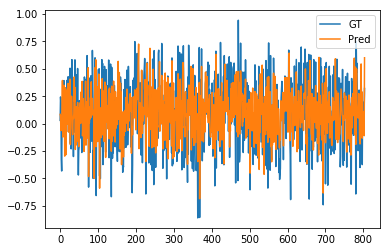

In [24]:
#plt.figure(figsize=(12,8))
plt.plot(yV_train, label='GT')
plt.plot(y_pred_lrV, label = 'Pred')
plt.legend(loc='upper right')
plt.show()

## Ridge Regression - Arousal

In [36]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridgeA = Ridge(alpha=0.000001)
ridgeA.fit(XA_train, yA_train)

y_pred_ridgeA = ridgeA.predict(XA_train)

print np.abs(cv.cross_val_score(ridgeA, XA_train, yA_train, cv=5, scoring='neg_mean_squared_error'))

print mean_squared_error(yA_train, y_pred_ridgeA)
print r2_score(yA_train, y_pred_ridgeA)

[ 0.17441242  0.18695993  0.13738842  0.15794872  0.15798352]
0.0583432091754
0.621338291957


## Ridge Regression - Valence

In [45]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridgeV = Ridge(alpha=0.0001)
ridgeV.fit(XV_train, yV_train)

y_pred_ridgeV = ridgeA.predict(XV_train)

print np.abs(cv.cross_val_score(ridgeV, XV_train, yV_train, cv=5, scoring='neg_mean_squared_error'))

print mean_squared_error(yV_train, y_pred_ridgeV)
print r2_score(yV_train, y_pred_ridgeV)

[ 0.11116971  0.11364343  0.11125496  0.11166489  0.11296473]
0.175012786972
-0.756217923778


## SVR - Arousal

In [48]:
from sklearn.svm import SVR

svr_rbf_A = SVR(kernel='rbf', C=1e1, gamma=0.1)                     

svr_lin_A = SVR(kernel='linear', C=1e3)

svr_poly_A = SVR(kernel='poly', C=1e3, degree=3)

y_pred_rbf_A = svr_rbf_A.fit(XA_train, yA_train).predict(XA_test)
y_pred_lin_A = svr_lin_A.fit(XA_train, yA_train).predict(XA_test)
y_pred_poly_A = svr_poly_A.fit(XA_train, yA_train).predict(XA_test)

print('RBF')
print mean_squared_error(yA_train, y_pred_rbf_A)
print r2_score(yA_train, y_pred_rbf_A)
print('Linear')
print mean_squared_error(yA_train, y_pred_lin_A)
print r2_score(yA_train, y_pred_lin_A)
print('Poly')
print mean_squared_error(yA_train, y_pred_poly_A)
print r2_score(yA_train, y_pred_poly_A)

RBF
0.171143898761
-0.110765793342
Linear
0.240526055206
-0.561072971138
Poly
0.158613885791
-0.0294429422346


## SVR - Arousal; Tuning Hyperparameters

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svrA = GridSearchCV(SVR(kernel='rbf'), cv=5,
                   param_grid={"C": [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                               "gamma": np.logspace(-2, 2, 10)})
svrA.fit(XA_train, yA_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0], 'gamma': array([  1.00000e-02,   2.78256e-02,   7.74264e-02,   2.15443e-01,
         5.99484e-01,   1.66810e+00,   4.64159e+00,   1.29155e+01,
         3.59381e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_svrA = svrA.predict(XA_train)
print('SVR - Arousal')
print mean_squared_error(yA_train, y_pred_svrA)
print r2_score(yA_train, y_pred_svrA)

SVR - Arousal
0.0753830662266
0.46786172097


In [8]:
y_pred_svrA = svrA.predict(XA_test)
print('SVR - Arousal')
print mean_squared_error(yA_test, y_pred_svrA)
print r2_score(yA_test, y_pred_svrA)

SVR - Arousal
0.109489211336
0.288031592091


## SVR - Valence; Tuning Hyperparameters

In [9]:
from sklearn.model_selection import GridSearchCV

svrV = GridSearchCV(SVR(kernel='rbf'), cv=5,
                   param_grid={"C": [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                               "gamma": np.logspace(-2, 2, 10)})
svrV.fit(XV_train, yV_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0], 'gamma': array([  1.00000e-02,   2.78256e-02,   7.74264e-02,   2.15443e-01,
         5.99484e-01,   1.66810e+00,   4.64159e+00,   1.29155e+01,
         3.59381e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [10]:
y_pred_svrV = svrV.predict(XV_train)
print('SVR - Valence')
print mean_squared_error(yV_train, y_pred_svrV)
print r2_score(yV_train, y_pred_svrV)

SVR - Valence
0.0840427097044
0.158044612088


In [11]:
y_pred_svrV = svrA.predict(XV_test)
print('SVR - Valence')
print mean_squared_error(yV_test, y_pred_svrV)
print r2_score(yV_test, y_pred_svrV)

SVR - Valence
0.153073320248
-0.54764983945


## GPR - Arousal (full)

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpA = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gpA.fit(X, yA)

y_pred_gprA, sigmaA = gpA.predict(X, return_std=True)
print mean_squared_error(yA, y_pred_gprA)
print r2_score(yA, y_pred_gprA)

1.16777632082e-19
1.0


## GPR - Valence (full)

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpV = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gpV.fit(X, yV)

y_pred_gprV, sigmaV = gpV.predict(X, return_std=True)
print mean_squared_error(yV, y_pred_gprV)
print r2_score(yV, y_pred_gprV)

1.11296110682e-19
1.0


In [20]:
y_pred_gprA_test, sigmaA = gpA.predict(XA_test, return_std=True)
print mean_squared_error(yA_test, y_pred_gprA_test)
print r2_score(yA_test, y_pred_gprA_test)

y_pred_gprV_test, sigmaV = gpV.predict(XV_test, return_std=True)
print mean_squared_error(yV_test, y_pred_gprV_test)
print r2_score(yV_test, y_pred_gprV_test)

1.17597422486e-19
1.0
1.11083260672e-19
1.0


## GPR - Arousal

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpA = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gpA.fit(XA_train, yA_train)

y_pred_gprA, sigmaA = gpA.predict(XA_train, return_std=True)
print mean_squared_error(yA_train, y_pred_gprA)
print r2_score(yA_train, y_pred_gprA)

y_pred_gprA, sigmaA = gpA.predict(XA_test, return_std=True)
print mean_squared_error(yA_test, y_pred_gprA)
print r2_score(yA_test, y_pred_gprA)

1.13215668212e-19
1.0
0.123546622418
0.196621374904


## GPR - Valence

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpV = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gpV.fit(XV_train, yV_train)

y_pred_gprV, sigmaV = gpV.predict(XV_train, return_std=True)
print mean_squared_error(yV_train, y_pred_gprV)
print r2_score(yV_train, y_pred_gprV)

y_pred_gprV, sigmaV = gpV.predict(XV_test, return_std=True)
print mean_squared_error(yV_test, y_pred_gprV)
print r2_score(yV_test, y_pred_gprV)

1.09020404536e-19
1.0
0.101001279374
-0.0211747778999


## Ensemble

In [26]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
ensA = ensemble.GradientBoostingRegressor(**params)

ensA.fit(XA_train, yA_train)
mseA_tr = mean_squared_error(yA_train, ensA.predict(XA_train))
mseA_te = mean_squared_error(yA_test, ensA.predict(XA_test))
print("MSE Arousal Train: %.4f" % mseA_tr)
print("MSE Arousal Test: %.4f" % mseA_te)

print r2_score(yA_train, ensA.predict(XA_train))
print r2_score(yA_test, ensA.predict(XA_test))

0.783758786362
0.279322529332


In [27]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
ensV = ensemble.GradientBoostingRegressor(**params)

ensV.fit(XV_train, yV_train)
mseV_tr = mean_squared_error(yV_train, ensV.predict(XV_train))
mseV_te = mean_squared_error(yV_test, ensV.predict(XV_test))
print("MSE Valence Train: %.4f" % mseV_tr)
print("MSE Valence Test: %.4f" % mseV_te)

print r2_score(yV_train, ensV.predict(XV_train))
print r2_score(yV_test, ensV.predict(XV_test))

0.675848491006
-0.0309197360535


## Split

In [28]:
(XA_train, XA_test, yA_train, yA_test) = cv.train_test_split(X, yA, test_size=0.25)
(XV_train, XV_test, yV_train, yV_test) = cv.train_test_split(X, yV, test_size=0.25)

In [29]:
# Ensemble - Arousal
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
ensA = ensemble.GradientBoostingRegressor(**params)

ensA.fit(XA_train, yA_train)
mseA_tr = mean_squared_error(yA_train, ensA.predict(XA_train))
mseA_te = mean_squared_error(yA_test, ensA.predict(XA_test))
print("MSE Arousal Train: %.4f" % mseA_tr)
print("MSE Arousal Test: %.4f" % mseA_te)

print r2_score(yA_train, ensA.predict(XA_train))
print r2_score(yA_test, ensA.predict(XA_test))

# Ensemble - Valence
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
ensV = ensemble.GradientBoostingRegressor(**params)

ensV.fit(XV_train, yV_train)
mseV_tr = mean_squared_error(yV_train, ensV.predict(XV_train))
mseV_te = mean_squared_error(yV_test, ensV.predict(XV_test))
print("MSE Valence Train: %.4f" % mseV_tr)
print("MSE Valence Test: %.4f" % mseV_te)

print r2_score(yV_train, ensV.predict(XV_train))
print r2_score(yV_test, ensV.predict(XV_test))

MSE Arousal Train: 0.0421
MSE Arousal Test: 0.0978
0.724630283691
0.265294739905
MSE Valence Train: 0.0459
MSE Valence Test: 0.0981
0.532330300478
0.0438844306241


## GPR on 25% test data

## GPR - Arousal

In [30]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpA = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gpA.fit(XA_train, yA_train)

y_pred_gprA, sigmaA = gpA.predict(XA_train, return_std=True)
print mean_squared_error(yA_train, y_pred_gprA)
print r2_score(yA_train, y_pred_gprA)

y_pred_gprA, sigmaA = gpA.predict(XA_test, return_std=True)
print mean_squared_error(yA_test, y_pred_gprA)
print r2_score(yA_test, y_pred_gprA)

1.06069873482e-19
1.0
0.107927281001
0.189609541604


## GPR - Valence

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpV = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gpV.fit(XV_train, yV_train)

y_pred_gprV, sigmaV = gpV.predict(XV_train, return_std=True)
print mean_squared_error(yV_train, y_pred_gprV)
print r2_score(yV_train, y_pred_gprV)

y_pred_gprV, sigmaV = gpV.predict(XV_test, return_std=True)
print mean_squared_error(yV_test, y_pred_gprV)
print r2_score(yV_test, y_pred_gprV)

1.10220868743e-19
1.0
0.099576952927
0.029853594799


## AdaBoost Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

### Arousal
# Fit regression model
adaA = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)
adaA.fit(XA_train, yA_train)

# Predict
y_pred_adaA_tr = adaA.predict(XA_train)
y_pred_adaA_te = adaA.predict(XA_test)
print mean_squared_error(yA_train, y_pred_adaA_tr)
print r2_score(yA_train, y_pred_adaA_tr)
print mean_squared_error(yA_test, y_pred_adaA_te)
print r2_score(yA_test, y_pred_adaA_te)

0.057918309628
0.620895324737
0.0947000189021
0.28892870258


In [33]:
### Valence
# Fit regression model
adaV = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)
adaV.fit(XV_train, yV_train)

# Predict
y_pred_adaV_tr = adaV.predict(XV_train)
y_pred_adaV_te = adaV.predict(XV_test)
print mean_squared_error(yV_train, y_pred_adaV_tr)
print r2_score(yV_train, y_pred_adaV_tr)
print mean_squared_error(yV_test, y_pred_adaV_te)
print r2_score(yV_test, y_pred_adaV_te)

0.0545655632898
0.444588620455
0.0990969989263
0.034529633127
